In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
encodings = []
for i in range(1000):
    filepath = './data/test-{}.csv'.format(i)  
    with open(filepath, mode='rb') as fp:
        encoding = str(fp.readline()).split("=")[1].split("\\")[0]
        encodings.append(encoding)

In [3]:
encodings_unique = set(encodings)

In [4]:
entities = 'abcdef'

In [5]:
entity_counter = {}
entity_unique_strings = {}
entity_values = {}

In [6]:
for entity in entities:
    entity_counter[entity] = 0
    entity_unique_strings[entity] = set([])
    entity_values[entity] = []

Q2 answer:
in cell #7 you can see how I did deal with misformated data. I had only 1000 files and I decided that I can't drop bad data, that's why I tried to do my best to transform data into correct form.

In [7]:
for i in range(1000):
    try:
        df = pd.read_csv("./data/test-{}.csv".format(i), encoding=encodings[i], skiprows=1, header=None)
        for row in range(df.shape[0]):
            entity_counter[df.iloc[row][0]] += 1
            entity_unique_strings[df.iloc[row][0]].add(df.iloc[row][2])
            entity_values[df.iloc[row][0]].append(float(''.join(ch for ch in str(df.iloc[row][1]).replace(',', '.') if ch in '0123456789.')))
    except:
#         print(i)
        try:
            with open("./data/test-{}.csv".format(i), encoding=encodings[i], mode='r') as f:
                temp = f.readline()
                text = ''
                while temp:
                    temp = f.readline().replace(',,', ',').replace(', ,', ',').replace(',\n', '\n')
                    if (len(temp.split(',')) > 3):
                        temp = ','.join(temp.split(',')[:3]) + '\n' 
                    text += temp
                df = pd.read_csv(StringIO(text), encoding=encodings[i], header=None, sep=',')
                for row in range(df.shape[0]):
                    entity_counter[df.iloc[rw][0]] += 1
                    entity_unique_strings[df.iloc[row][0]].add(df.iloc[row][2])
                    entity_values[df.iloc[row][0]].append(float(''.join(ch for ch in str(df.iloc[row][1]).replace(',', '.') if ch in '0123456789.')))
        except UnicodeDecodeError:
            with open("./data/test-{}.csv".format(i), encoding='cp437', mode='r') as f:
                temp = f.readline()
                text = ''
                while temp:
                    temp = f.readline().replace(',,', ',').replace(', ,', ',').replace(',\n', '\n')
                    if (len(temp.split(',')) > 3):
                        temp = ','.join(temp.split(',')[:3]) + '\n' 
                    text += temp
                df = pd.read_csv(StringIO(text), encoding=encodings[i], header=None, sep=',')
                for row in range(df.shape[0]):
                    entity_counter[df.iloc[row][0]] += 1
#                     print(df.iloc[raw][2])
                    entity_unique_strings[df.iloc[row][0]].add(df.iloc[row][2])
                    entity_values[df.iloc[row][0]].append(float(''.join(ch for ch in str(df.iloc[row][1]).replace(',', '.') if ch in '0123456789.')))
        
        

## Task #1

In [8]:
for i in entity_counter:
    print("Entity {} occur {} times.".format(i, entity_counter[i]))

Entity a occur 987 times.
Entity b occur 988 times.
Entity c occur 985 times.
Entity d occur 991 times.
Entity e occur 992 times.
Entity f occur 991 times.


<BarContainer object of 6 artists>

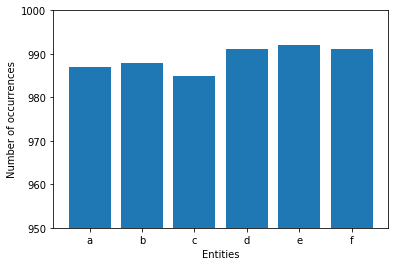

In [9]:
plt.ylim((950,1000))
plt.xlabel('Entities')
plt.ylabel('Number of occurrences')
plt.bar(entity_counter.keys(), entity_counter.values())

## Task #2

In [10]:
for i in entities:
    print('Entity {} have {} different strings.'.format(i, len(entity_unique_strings[i])))

Entity a have 974 different strings.
Entity b have 988 different strings.
Entity c have 985 different strings.
Entity d have 989 different strings.
Entity e have 986 different strings.
Entity f have 989 different strings.


<BarContainer object of 6 artists>

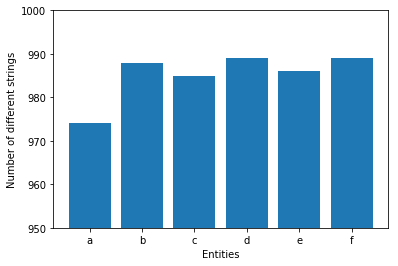

In [11]:
plt.ylim((950,1000))
plt.xlabel('Entities')
plt.ylabel('Number of different strings')
plt.bar(entity_unique_strings.keys(), [len(i) for i in entity_unique_strings.values()])

## Task #3

below each histogram you can find answer for Q1

### Entity 'a'

In [12]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['a']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

Is correct?

In [13]:
sum(frequencies.values()) == entity_counter['a']

True

<BarContainer object of 20 artists>

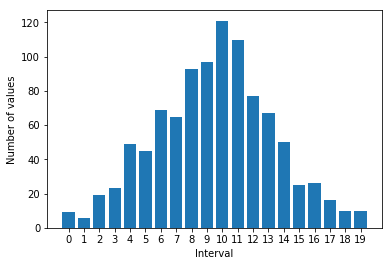

In [14]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like a normal distribution with $\mu = 10$

### Entity 'b'

In [15]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['b']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

is correct?

In [16]:
sum(frequencies.values()) == entity_counter['b']

True

<BarContainer object of 20 artists>

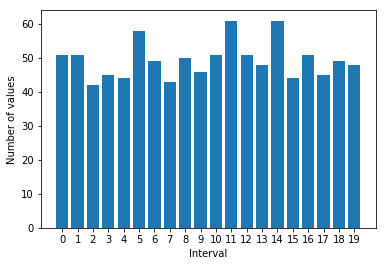

In [17]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like a uniform distribution

### Entity 'c'

In [18]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['c']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

is correct?

In [19]:
sum(frequencies.values()) == entity_counter['c']

True

<BarContainer object of 20 artists>

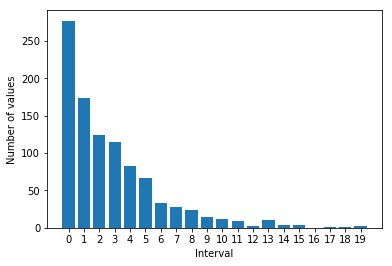

In [20]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like an exponential distribution

### Entity 'd'

In [21]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['d']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

is correct?

In [22]:
sum(frequencies.values()) == entity_counter['d']

True

<BarContainer object of 20 artists>

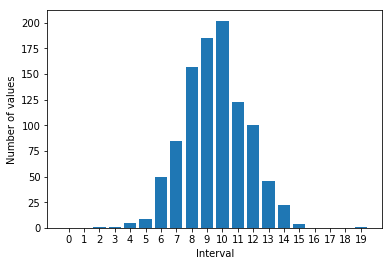

In [23]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like a chi-square distribution

### Entity 'e'

In [24]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['e']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

is correct?

In [25]:
sum(frequencies.values()) == entity_counter['e']

True

<BarContainer object of 20 artists>

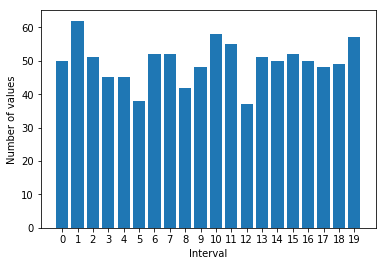

In [26]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like a uniform distribution

### Entity 'f'

In [27]:
bins = np.linspace(1.0, 19.0, 19)
inds = np.digitize(np.array(entity_values['f']).astype('float32'), bins)
unique = np.arange(20)
frequencies = dict(((i,0) for i in unique))
for i in inds:
    frequencies[i] += 1

is correct?

In [28]:
sum(frequencies.values()) == entity_counter['f']

True

<BarContainer object of 20 artists>

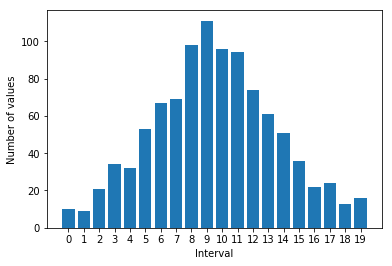

In [29]:
plt.xlabel('Interval')
plt.xticks(np.arange(20))
plt.ylabel('Number of values')
plt.bar(frequencies.keys(), frequencies.values())

it looks like a normal distribution with $\mu = 10$

Q2 answer:
in cell #7 you can see how I did deal with misformated data. I had only 1000 files and I decided that I can't drop bad data, that's why I tried to do my best to transform data into correct form.

Problems I found:
- wrong encoding specified in first line -- I use try-except statement for it, if exception I found that all wrong files have encoding 'cp437'
- ',,' instead of ',' what means +1 column -- I use try-except statement for it, if exception read file line-by-line with replece
- ',' at the end fo row what also means +1 column -- previous case
- ',' in string -- in this case I use only first part of string
- value problems: string in value column, not numbers in string -- I use handmade filtering for numbers and '.' and use float() function